In [0]:
import numpy as np

from tensorflow.python.keras import layers
from tensorflow.python.keras import models

from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

## Import data

In [9]:
uploaded = files.upload()

In [0]:
sourceImgs = []
resultImgs = []

(153, 380, 4)

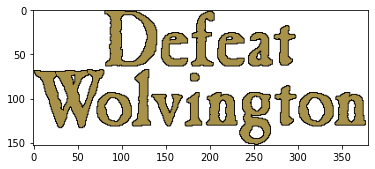

In [39]:
img = mpimg.imread('BOSSNAME0 (3).png')
imgplot = plt.imshow(img)

img.shape

(153, 380, 4)

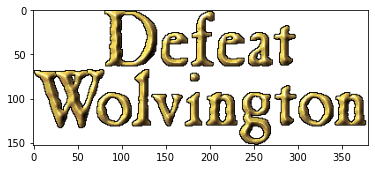

In [34]:
img2 = mpimg.imread('BOSSNAME1 (3).png')
imgplot = plt.imshow(img2)

img2.shape

In [0]:
assert img.shape == img2.shape

sourceImgs.append(img)
resultImgs.append(img2)

# Split image to training data

In [0]:
kernel_radius = 5

empty = np.array([0.0, 0.0, 0.0, 0.0])

def parse(sourceImg, targetImg):
  sources = []
  results = []
  for y in range(sourceImg.shape[0]):
    for x in range(sourceImg.shape[1]):
      pixels = []
      for y2 in range(y-kernel_radius, y+kernel_radius+1):
        for x2 in range(x-kernel_radius, x+kernel_radius+1):
          if x2 < 0 or y2 < 0 or y2 >= sourceImg.shape[0] or x2 >= sourceImg.shape[1]:
            pixels.append(empty)
          else:
            pixels.append(sourceImg[y2][x2])
      sources.append(np.array(pixels).flatten())
      results.append(targetImg[y][x])
  return sources, results

In [0]:
sources = []
results = []

for i in range(len(sourceImgs)):
  src, res = parse(sourceImgs[i], resultImgs[i])
  sources += src
  results += res

inputs = np.array(sources)
outputs = np.array(results)

# Create and train model

In [42]:
kernel_size = kernel_radius * 2 + 1
input_dim = kernel_size * kernel_size * 4

model = models.Sequential()
model.add(layers.Input(input_dim))
model.add(layers.BatchNormalization())
model.add(layers.Dense(500, activation='sigmoid'))
model.add(layers.Dense(250, activation='sigmoid'))
model.add(layers.Dense(125, activation='sigmoid'))
model.add(layers.Dense(62, activation='sigmoid'))
model.add(layers.Dense(31, activation='sigmoid'))
model.add(layers.Dense(15, activation='sigmoid'))
model.add(layers.Dense(7, activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 484)               1936      
_________________________________________________________________
dense (Dense)                (None, 500)               242500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 62)                7812      
_________________________________________________________________
dense_4 (Dense)              (None, 31)                1953      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                4

In [43]:
model.fit(inputs, outputs, epochs=100, batch_size=50, shuffle=True)

Epoch 1/100
5161/5161 [==============================] - 31s 6ms/step - loss: 0.0768 - accuracy: 0.2338
Epoch 2/100
5161/5161 [==============================] - 30s 6ms/step - loss: 0.0102 - accuracy: 0.4327
Epoch 3/100
5161/5161 [==============================] - 30s 6ms/step - loss: 0.0033 - accuracy: 0.4461
Epoch 4/100
5161/5161 [==============================] - 29s 6ms/step - loss: 0.0029 - accuracy: 0.3391
Epoch 5/100
5161/5161 [==============================] - 30s 6ms/step - loss: 0.0028 - accuracy: 0.2872
Epoch 6/100
5161/5161 [==============================] - 28s 5ms/step - loss: 0.0027 - accuracy: 0.2871
Epoch 7/100
5161/5161 [==============================] - 29s 6ms/step - loss: 0.0026 - accuracy: 0.2873
Epoch 8/100
5161/5161 [==============================] - 30s 6ms/step - loss: 0.0025 - accuracy: 0.2871
Epoch 9/100
5161/5161 [==============================] - 30s 6ms/step - loss: 0.0024 - accuracy: 0.2870
Epoch 10/100
5161/5161 [==============================] - 30s 6m

# Check results!

## On original image

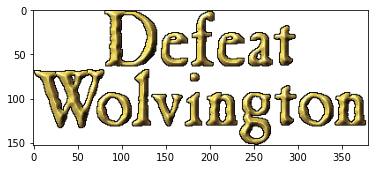

In [44]:
def display_prediction(img):
  parsedImg, _ = parse(img, img)
  r = model.predict(np.array(parsedImg)).reshape(img.shape)
  #res = np.copy(img)

  #for y in range(img.shape[0]):
  #  for x in range(img.shape[1]):
  #    color = r[y][x]
  #    for i in range(3):
  #      res[y][x][i] = color

  plt.imshow(r)
  return r

res = display_prediction(img)

## On another image:

(132, 276, 4)

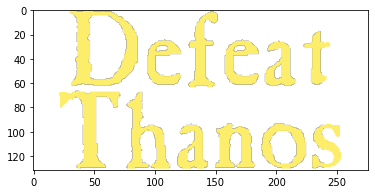

In [48]:
test = mpimg.imread('defeatThanos2.png')
imgplot = plt.imshow(test)

test.shape

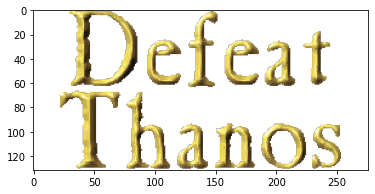

In [49]:
res = display_prediction(test)

In [0]:
Image.fromarray((res * 255).astype('uint8')).save("result.png")
files.download('result.png')

# Save / Load weights

In [0]:
model.save_weights('./weights.h5', overwrite=True)

files.download('weights.h5')

In [0]:
uploaded = files.upload()

In [0]:
model.load_weights('./weights.h5')